In [17]:
import pandas as pd
import numpy as np

In [18]:
data = pd.read_csv("fulldataset.csv")
data.head()

,gender,hypertension,heart_disease,smoking_history,diabetes
0,Female,0,1,never,0
1,Female,0,0,current,0
2,Male,0,0,never,0
3,Female,0,0,current,0
4,Male,1,1,current,0


In [19]:
data.isnull().sum()

gender             0
hypertension       0
heart_disease      0
smoking_history    0
diabetes           0
dtype: int64

In [20]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
hypertension,100000.0,0.07485,0.263150,0.0,0.0,0.0,0.0,1.0
heart_disease,100000.0,0.03942,0.194593,0.0,0.0,0.0,0.0,1.0
diabetes,100000.0,0.08500,0.278883,0.0,0.0,0.0,0.0,1.0


In [21]:
data_copy = data.copy(deep=True)
data_copy['gender'].replace(['Male', 'Female','Other'],
                        [2,1, 0], inplace=True)
data_copy['smoking_history'].replace(['current', 'former','never','not current'],
                        [3,2,1, 0], inplace=True)


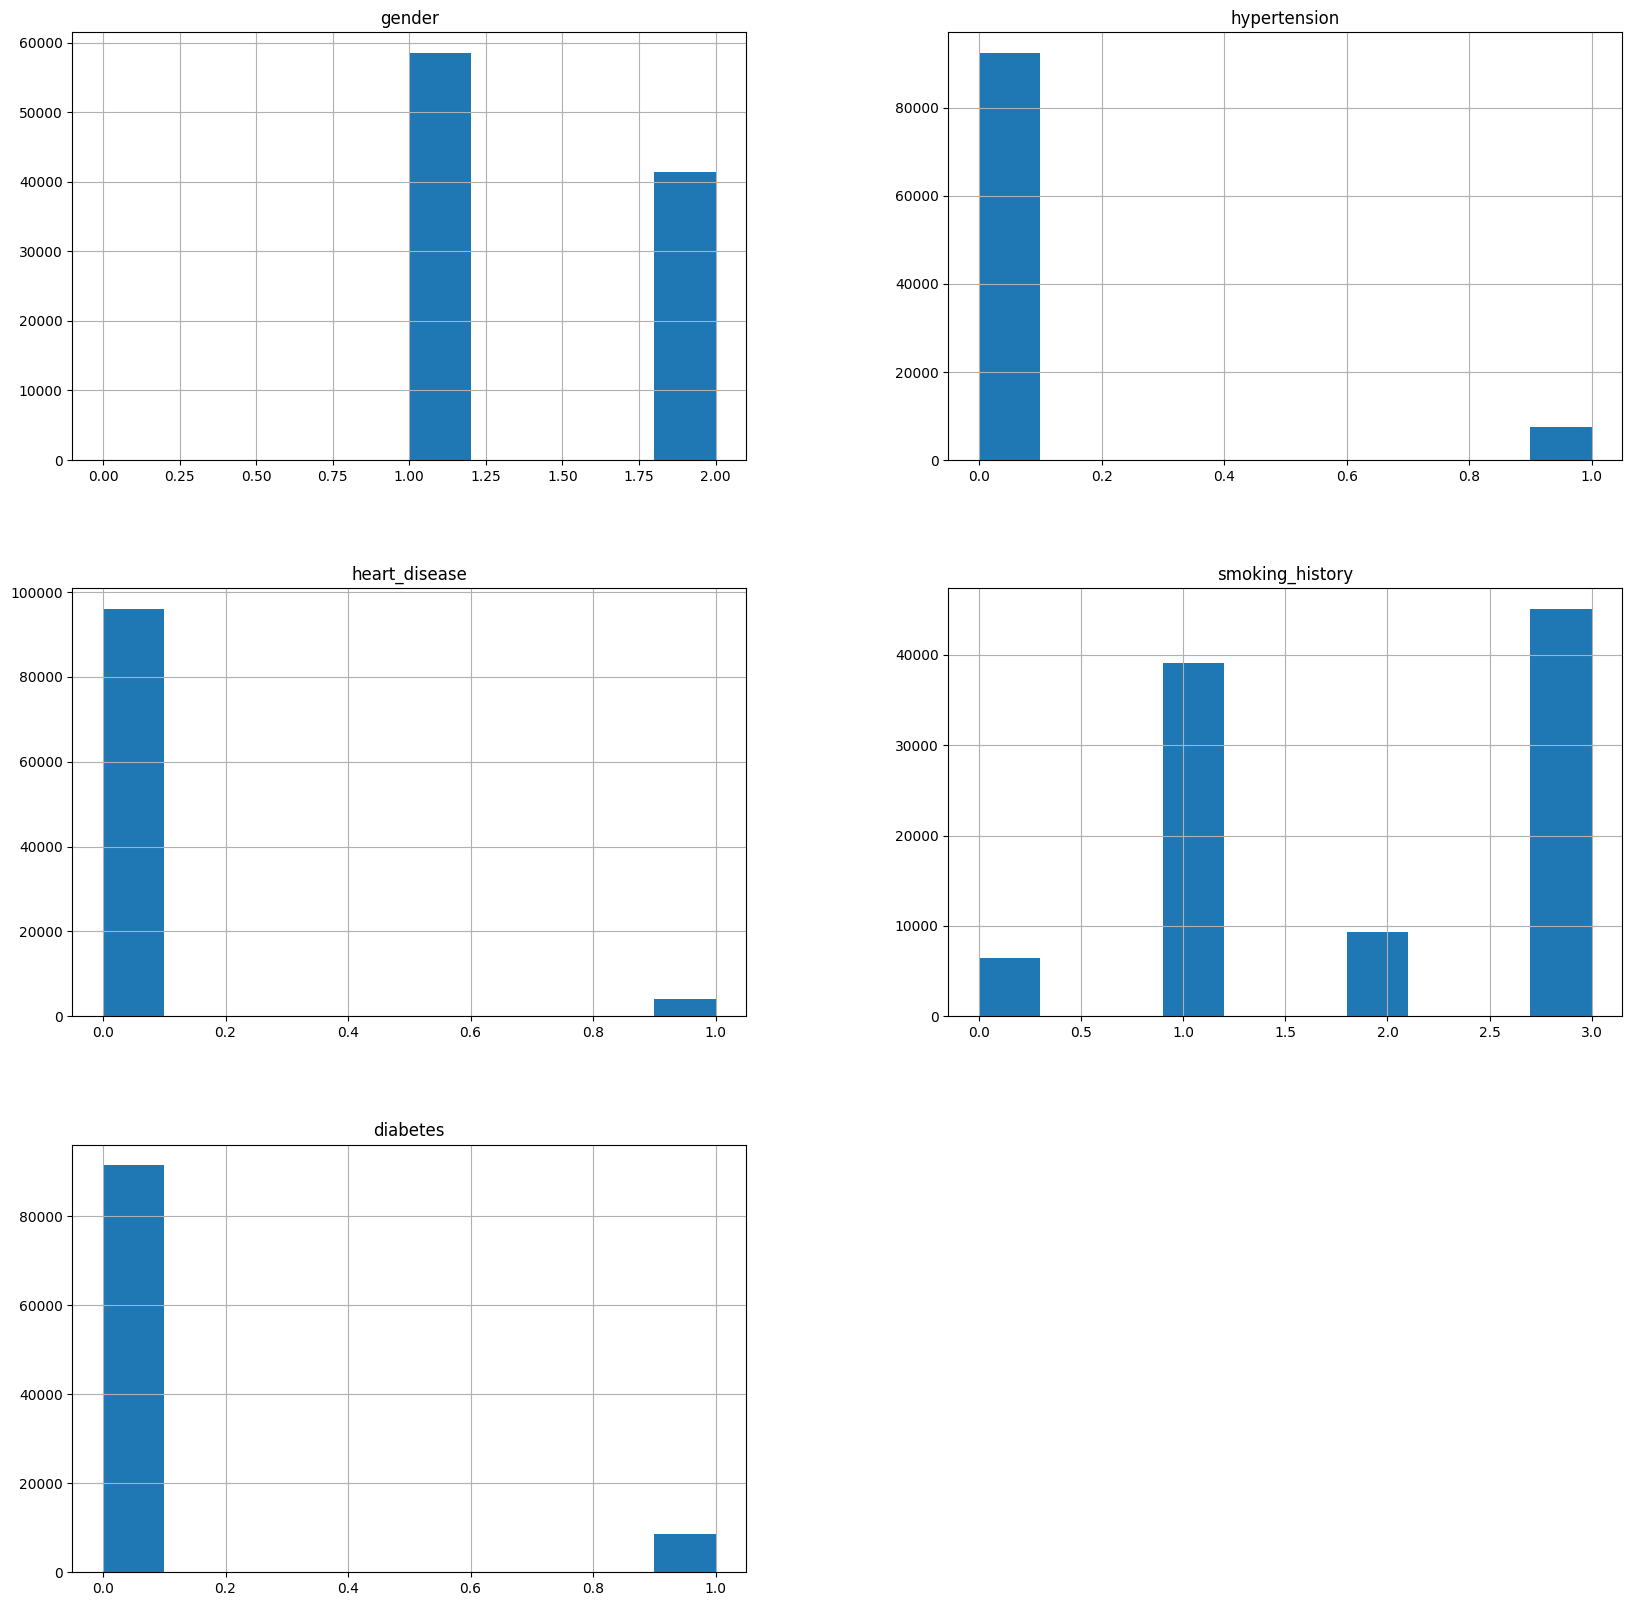

In [22]:
p = data_copy.hist(figsize= (20,20))

In [23]:
data_copy['gender'].fillna(data_copy['gender'].mean(),inplace = True)
data_copy['hypertension'].fillna(data_copy['hypertension'].mean(),inplace = True)
data_copy['heart_disease'].fillna(data_copy['heart_disease'].mean(),inplace = True)
data_copy['smoking_history'].fillna(data_copy['smoking_history'].mean(),inplace = True)

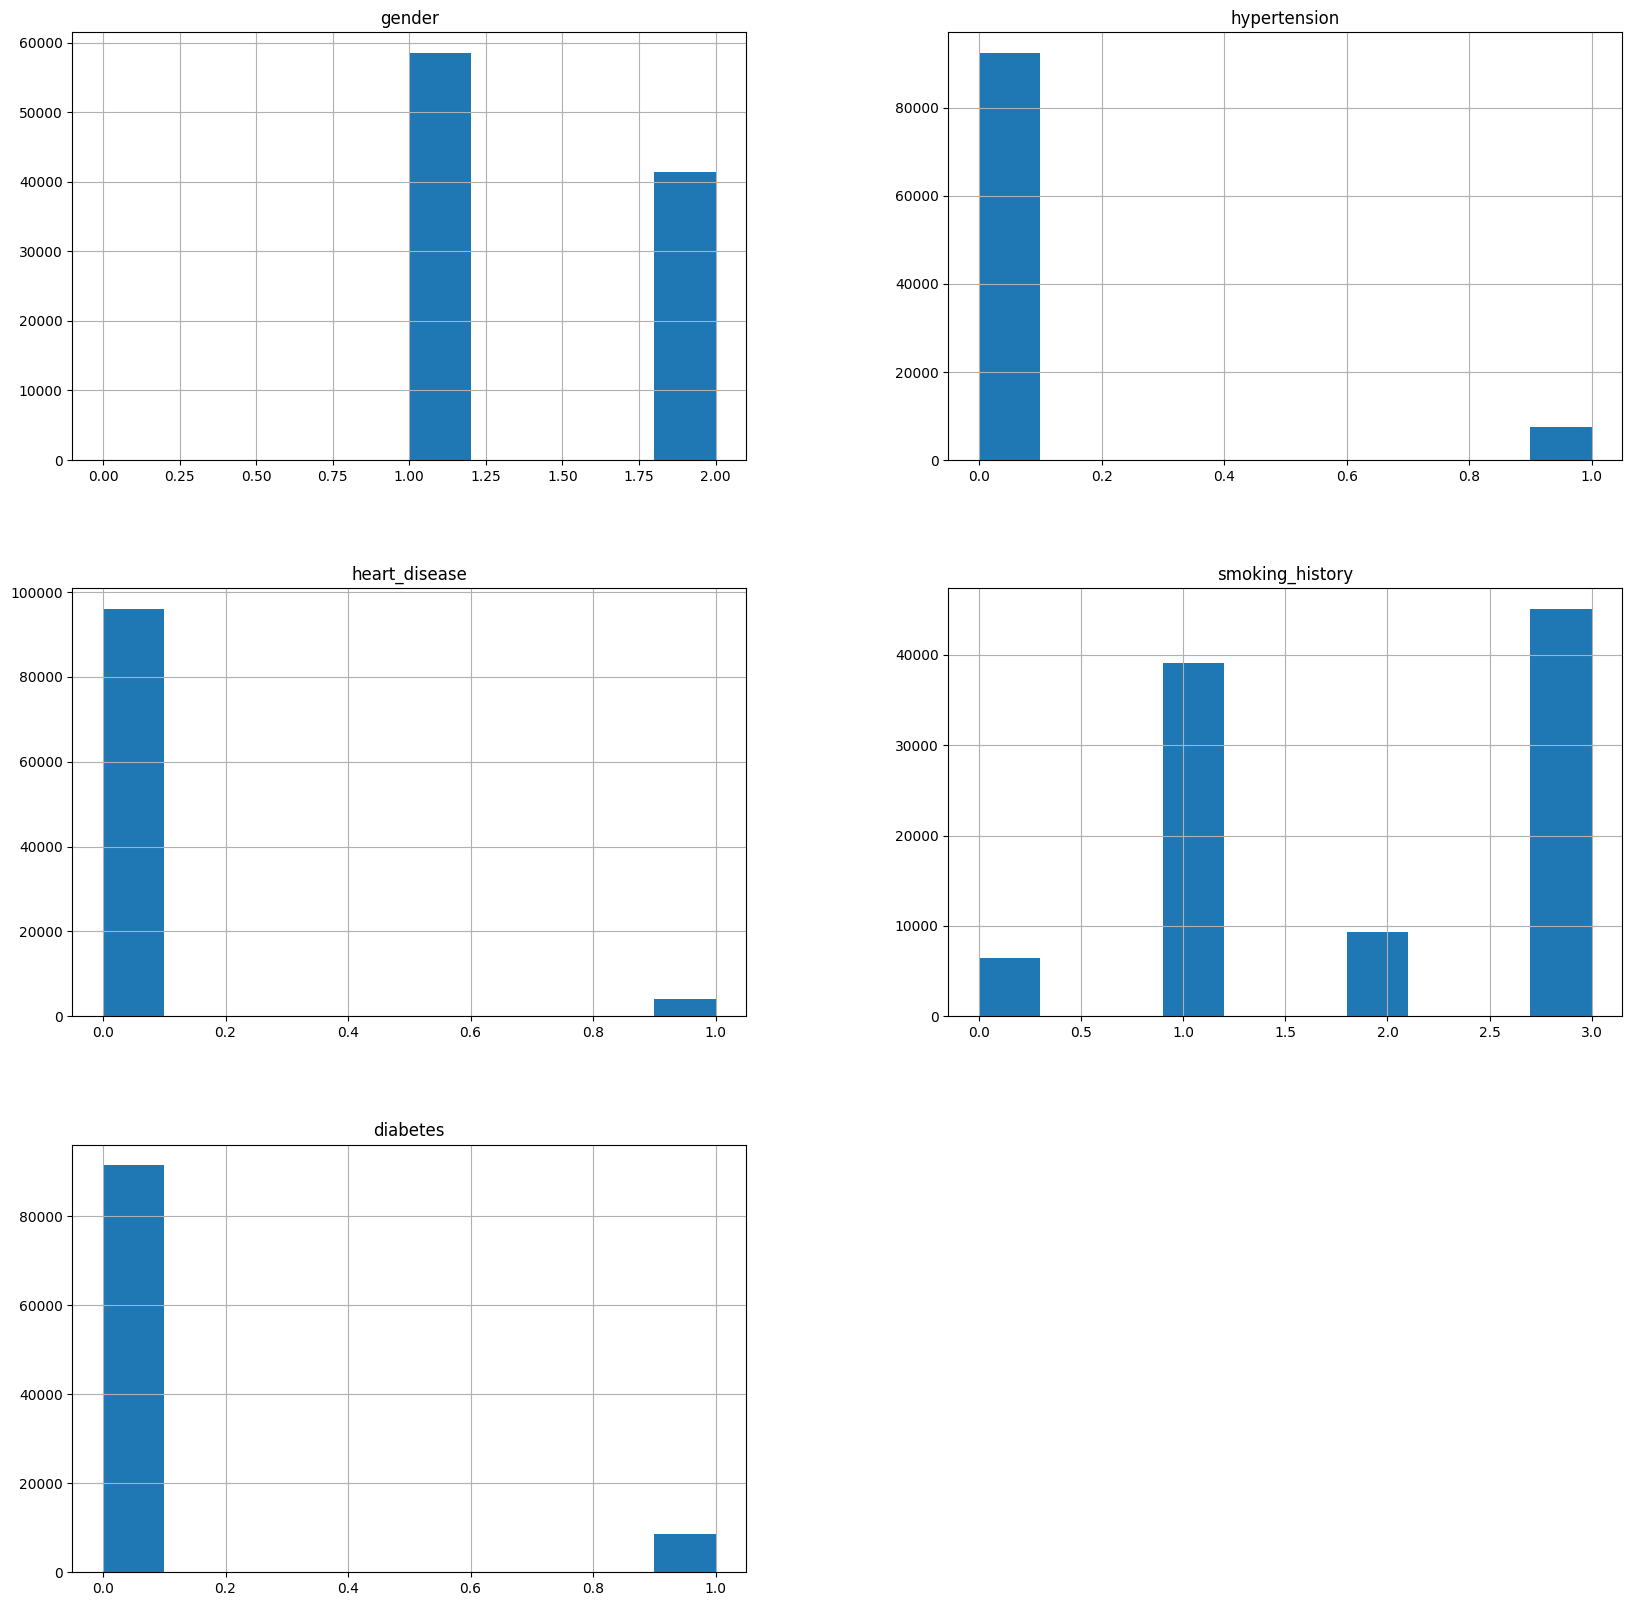

In [24]:
p = data_copy.hist(figsize= (20,20))

In [25]:
import matplotlib.pyplot as plt 

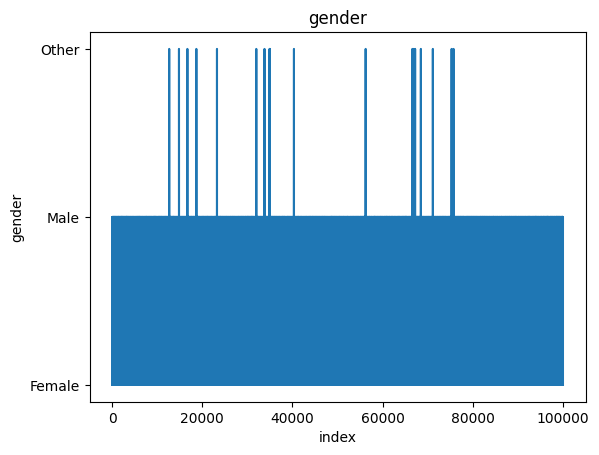

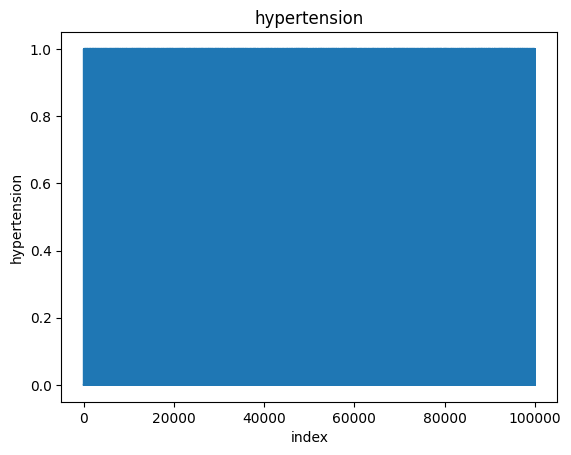

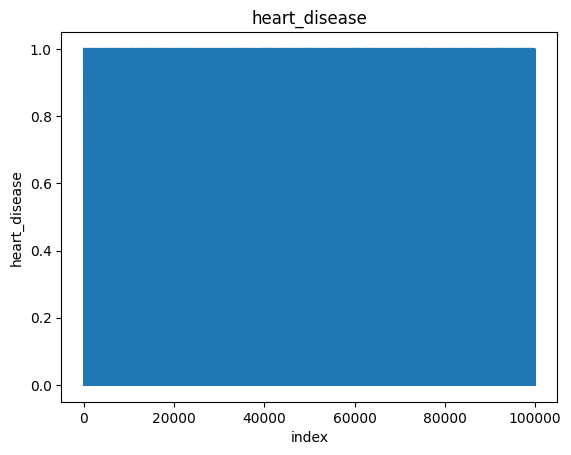

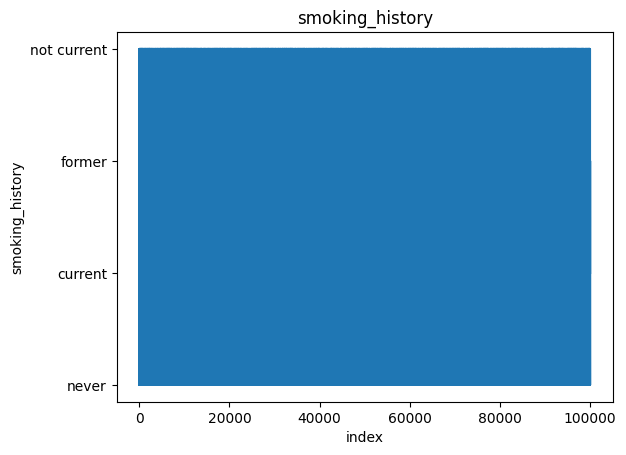

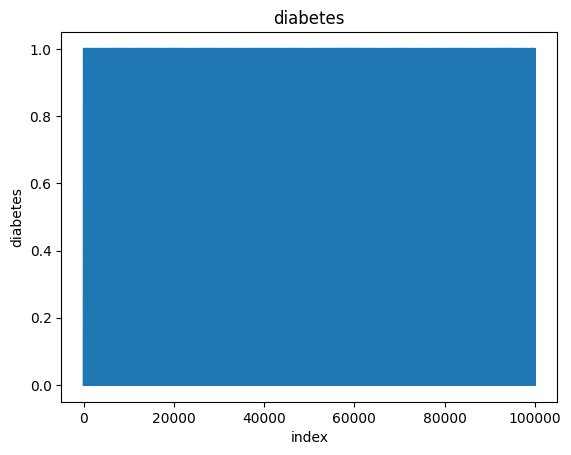

In [26]:
for attributes in data.columns:
    plt.figure()
    plt.title(attributes)
    plt.xlabel('index')
    plt.ylabel(attributes)
    plt.plot(data[attributes])
    plt.show

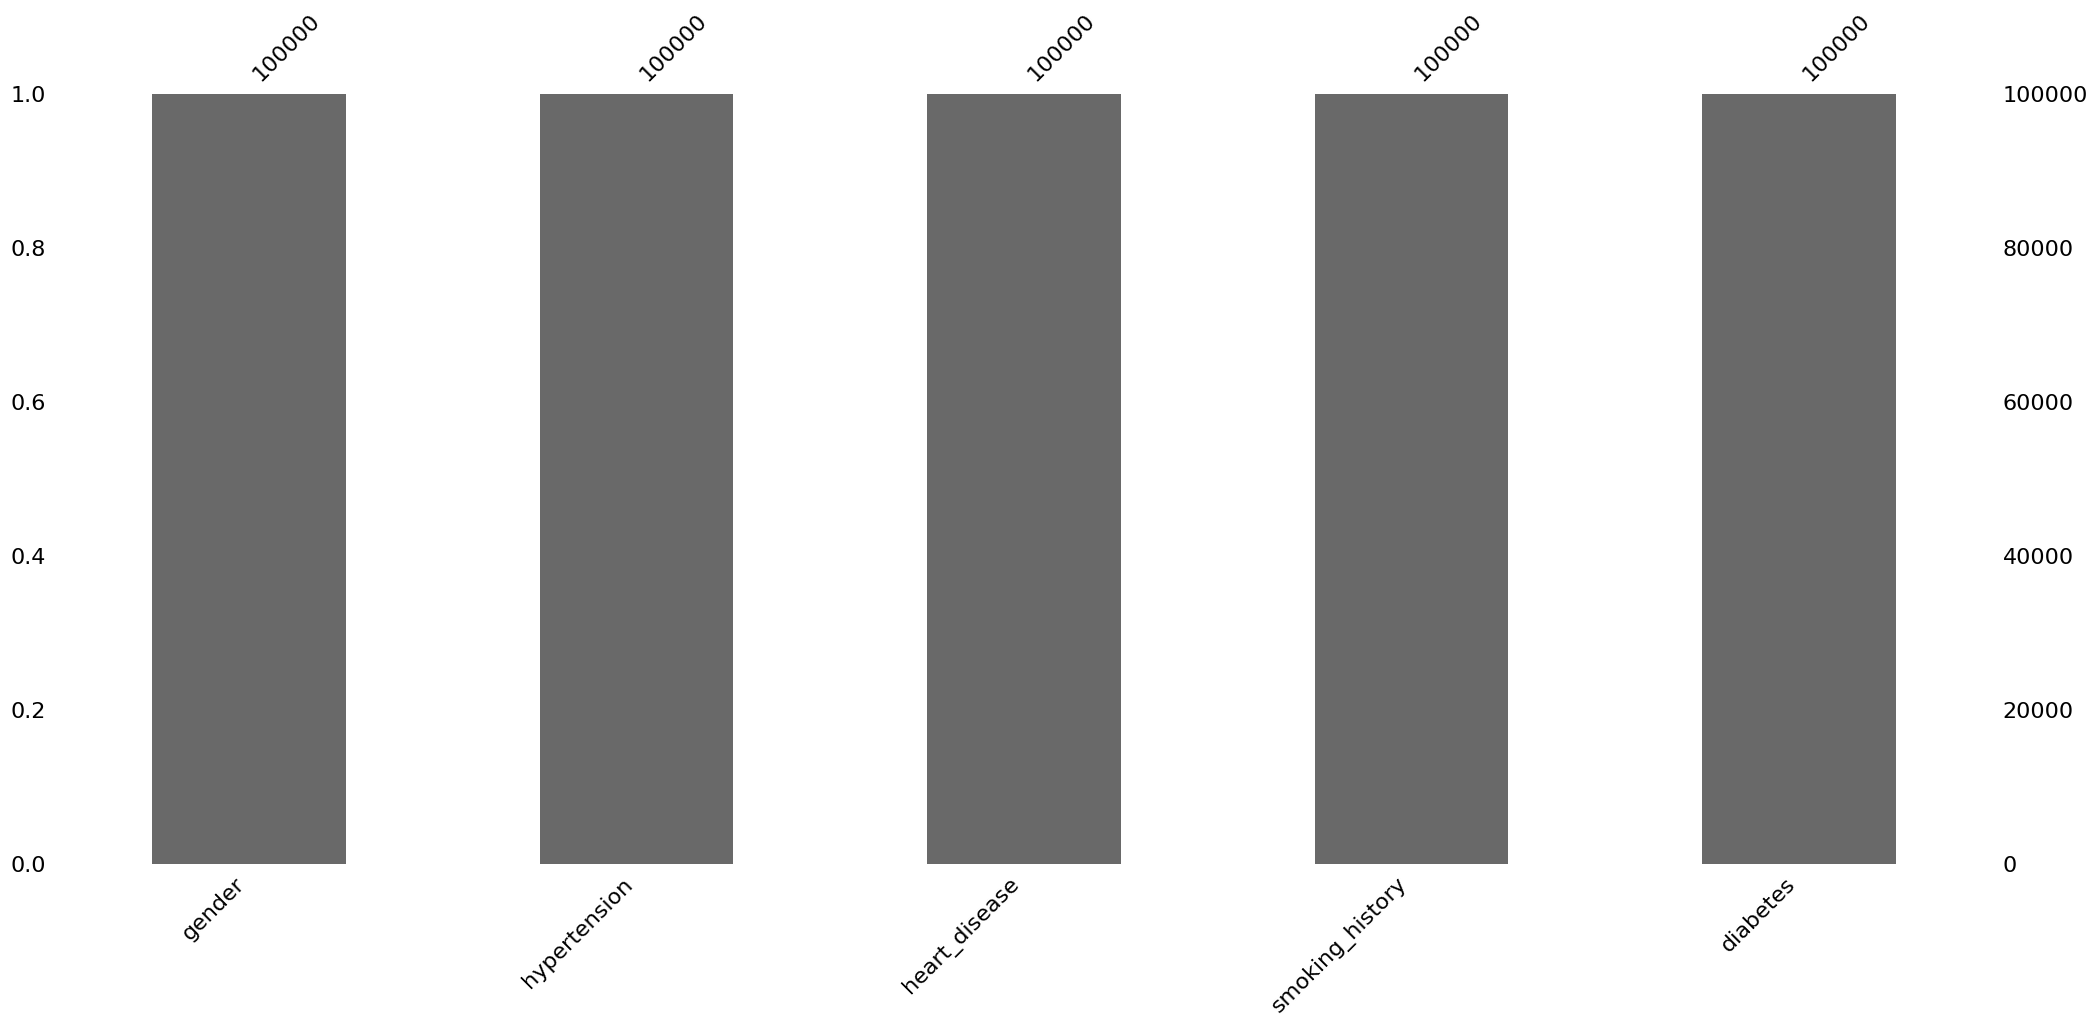

In [27]:
import missingno as msp
p = msp.bar(data)


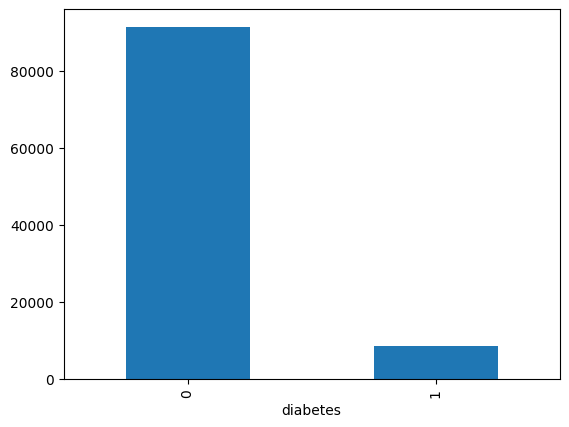

In [28]:
p = data_copy.diabetes.value_counts().plot(kind="bar")

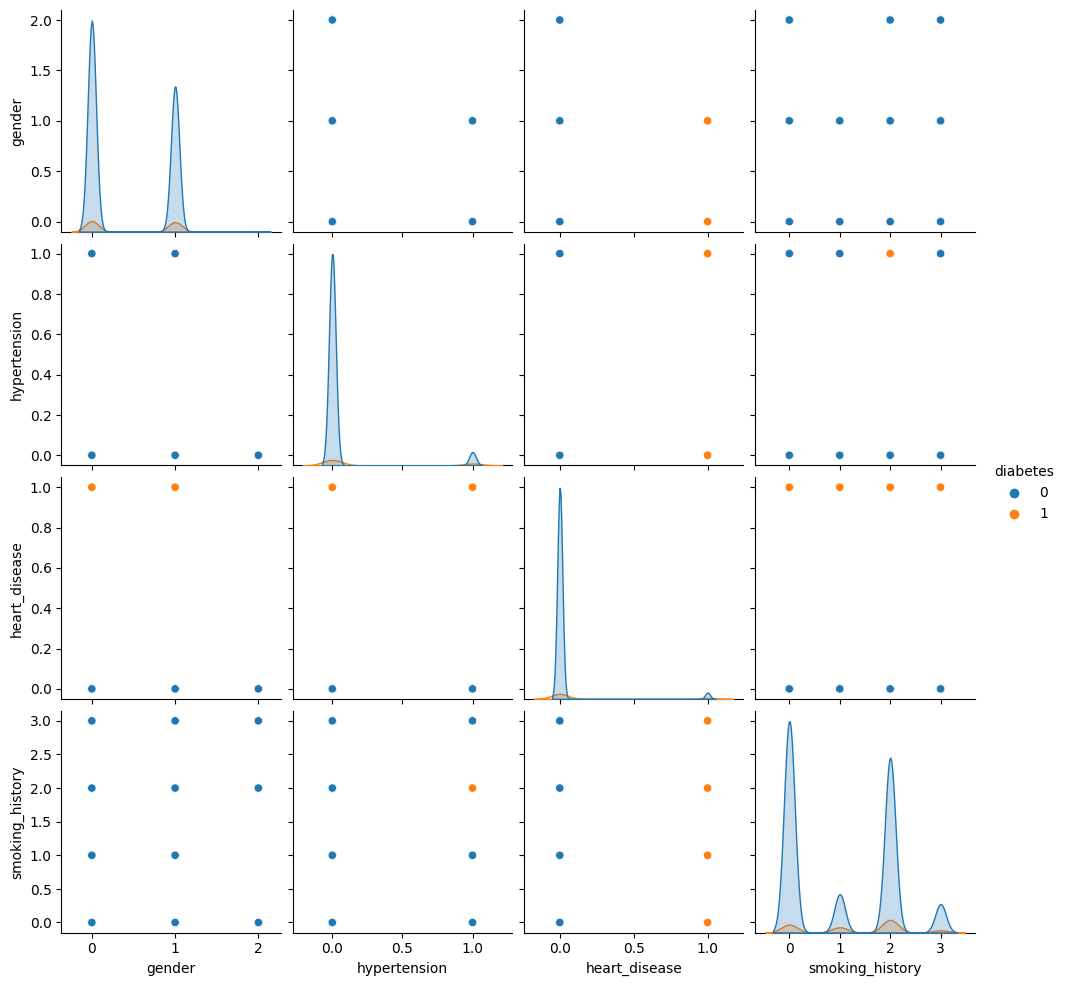

In [29]:
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
data['gender'] = encoder.fit_transform(data['gender'])
data['hypertension'] = encoder.fit_transform(data['hypertension'])
data['heart_disease'] = encoder.fit_transform(data['heart_disease'])
data['smoking_history'] = encoder.fit_transform(data['smoking_history'])
data['diabetes'] = encoder.fit_transform(data['diabetes'])

p = sns.pairplot(data, vars=['gender','hypertension','heart_disease','smoking_history'],hue="diabetes")

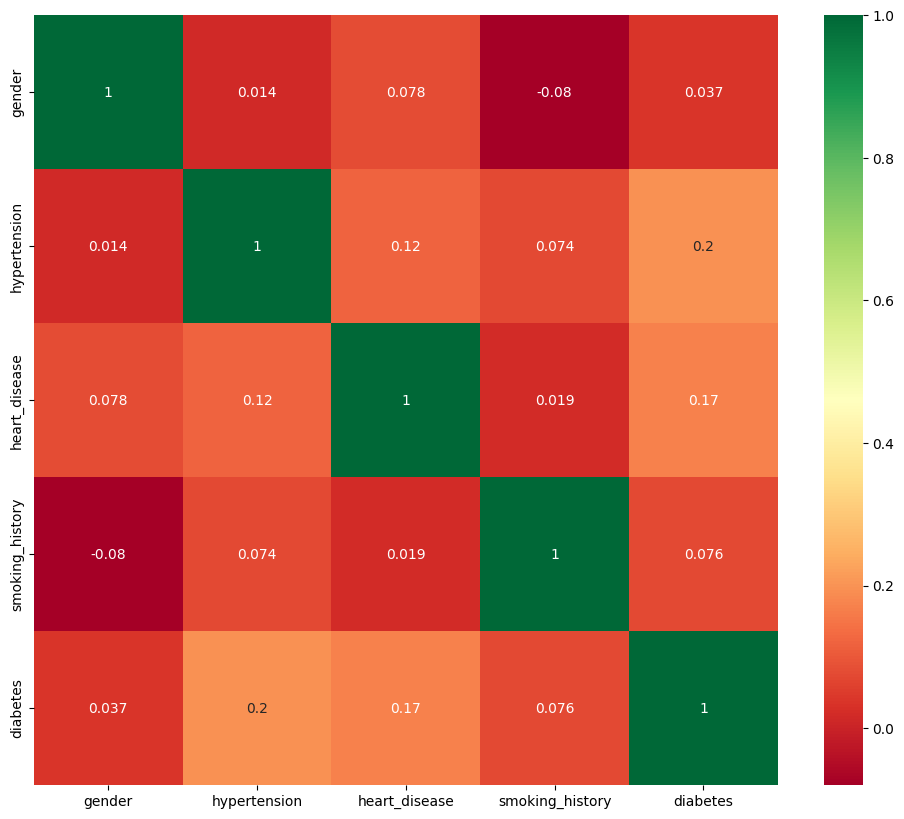

In [30]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,10))
p = sns.heatmap(data.corr(),annot=True,cmap='RdYlGn')

In [31]:
from sklearn.preprocessing import StandardScaler
encoder = LabelEncoder()
data['gender']=encoder.fit_transform(data['gender'])
data_copy= data.drop(["diabetes"],axis=1)
sc_X=StandardScaler()
X = pd.DataFrame(sc_X.fit_transform(data_copy),columns=['gender','hypertension','heart_disease','smoking_history'])

In [32]:
y = data.diabetes

In [33]:
X.head()

,gender,hypertension,heart_disease,smoking_history
0,-0.841029,-0.284439,4.936379,0.889682
1,-0.841029,-0.284439,-0.202578,-1.021455
2,1.187258,-0.284439,-0.202578,0.889682
3,-0.841029,-0.284439,-0.202578,-1.021455
4,1.187258,3.515687,4.936379,-1.021455


In [34]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, random_state=42)

In [35]:
from sklearn.neighbors import KNeighborsClassifier
train_scores = []
test_scores = []
for i in range(1,15):
    knn = KNeighborsClassifier(i)
    knn.fit(X_train,y_train)
    train_scores.append(knn.score(X_train,y_train))
    test_scores.append(knn.score(X_test,y_test))

In [36]:
max_test_score = max(test_scores)

In [37]:
test_score_index = [i for i, v in enumerate(test_scores) if v == max_test_score]
print('Max test score is{} % and k = {}'.format(max_test_score*100,list(map(lambda x: x+1, test_score_index))))

Max test score is91.59116817663647 % and k = [8]


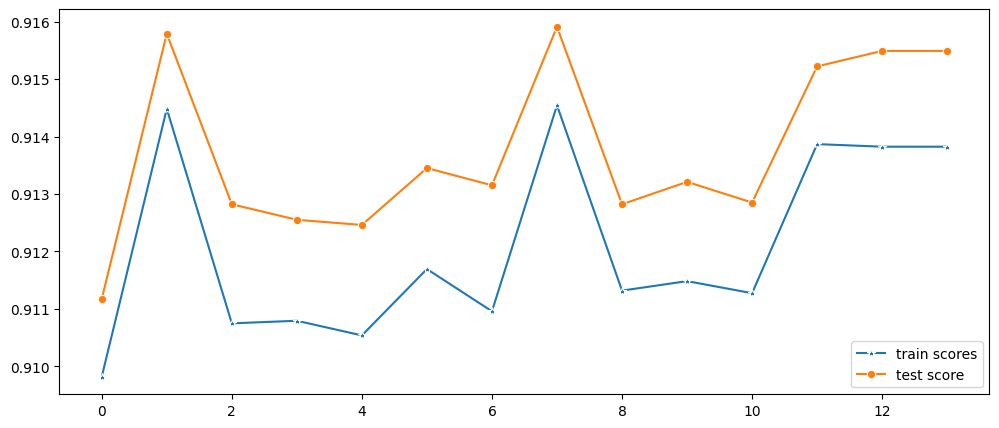

In [38]:
plt.figure(figsize=(12,5))
p = sns.lineplot(train_scores, marker='*', label='train scores')
p = sns.lineplot(test_scores, marker='o',label='test score')

In [39]:
knn = KNeighborsClassifier(7)
knn.fit(X_train,y_train)
knn.score(X_test,y_test)

0.9131517369652606

c:\Users\shazi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


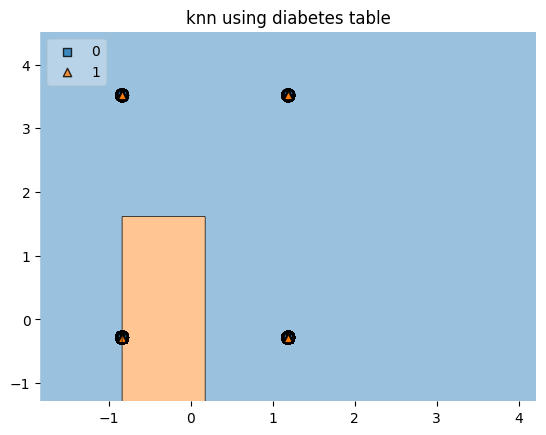

In [40]:
from mlxtend.plotting import plot_decision_regions
value = 20000
width = 20000
plot_decision_regions(X.values,y.values,clf = knn, legend = 2,filler_feature_values={2: value,3: value},
                      filler_feature_ranges={2: width,3: width},
                      X_highlight=X_test.values)
plt.title("knn using diabetes table")
plt.show()


In [41]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, fbeta_score
y_pred = knn.predict(X_test)

cnf_matrix = confusion_matrix(y_test, y_pred)

Text(0.5, 23.52222222222222, 'Predicted label')

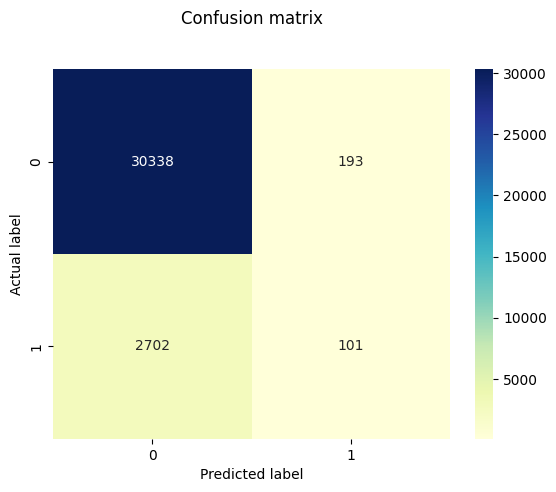

In [42]:
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [43]:
def model_evaluation(y_test, y_pred, model_name):
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    f2 = fbeta_score(y_test, y_pred, beta = 2.0)

    results = pd.DataFrame([[model_name, acc, prec, rec, f1, f2]], 
                       columns = ["Model", "Accuracy", "Precision", "Recall",
                                 "F1 SCore", "F2 Score"])
    results = results.sort_values(["Precision", "Recall", "F2 Score"], ascending = False)
    return results



model_evaluation(y_test, y_pred, "KNN")

,Model,Accuracy,Precision,Recall,F1 SCore,F2 Score
0,KNN,0.913152,0.343537,0.036033,0.065224,0.04389


In [44]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, zero_division=0))

              precision    recall  f1-score   support

           0       0.92      0.99      0.95     30531
           1       0.34      0.04      0.07      2803

    accuracy                           0.91     33334
   macro avg       0.63      0.51      0.51     33334
weighted avg       0.87      0.91      0.88     33334



In [45]:
from sklearn.metrics import auc, roc_auc_score, roc_curve

y_pred_proba = knn.predict_proba(X_test)[:,-1]
fpr, tpr, threshold = roc_curve(y_test, y_pred_proba)

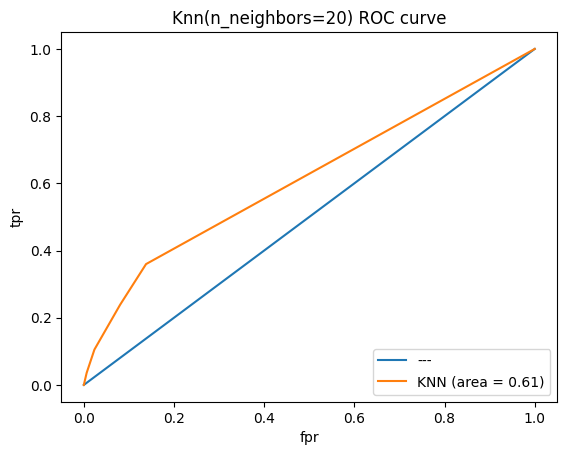

In [46]:
classifier_roc_auc = roc_auc_score(y_test, y_pred_proba)
plt.plot([0,1],[0,1], label = "---")
 
plt.plot(fpr, tpr, label ='KNN (area = %0.2f)' % classifier_roc_auc)
plt.xlabel("fpr")
plt.ylabel("tpr")
plt.title('Knn(n_neighbors=20) ROC curve')
plt.legend(loc="lower right", fontsize = "medium")
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")
plt.show()

In [47]:
from sklearn.model_selection import GridSearchCV
parameters_grid = {"n_neighbors": np.arange(0,50)}
knn= KNeighborsClassifier()
knn_GSV = GridSearchCV(knn, param_grid=parameters_grid, cv = 5)
knn_GSV.fit(X, y)

In [ ]:
print("Best Params" ,knn_GSV.best_params_)
print("Best score" ,knn_GSV.best_score_)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
decision_tree = tree.DecisionTreeClassifier()

In [ ]:
decision_tree.fit(X_train,y_train)

In [ ]:
plt.figure()
tree.plot_tree(decision_tree, feature_names=X_train.columns, class_names=['No', 'Yes'], filled=True)
plt.show()